**Goal**: Learn how to reshape, slice, and perform arithmetic operations with tensors.

In [2]:
import torch

### Flattening a Tensor (Converting to 1D)
**Flattening** a tensor is one of the most common reshaping operations, especially in deep learning where you need to pass data to a fully connected (dense) layer.

In [27]:
# Create a 2x3 tensor
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Flatten the tensor to a 1D tensor
# The -1 argument tells PyTorch to infer the dimension automatically, converting the tensor into a 1D tensor with 6 elements.
flattened = tensor.view(-1) # or tensor.reshape(-1)

print(flattened)

tensor([1, 2, 3, 4, 5, 6])


### Reshaping a 2D Tensor to Another 2D Shape
Reshaping a tensor to another 2D shape can be useful when adjusting dimensions to match model input requirements.

In [28]:
# Create a 2x3 tensor
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Reshape to a 3x2 tensor
reshaped_tensor = tensor.view(3, 2) # or tensor.reshape(3, 2)

print(reshaped_tensor)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


### Reshaping a 3D Tensor
Reshaping 3D tensors is common when dealing with image data or sequence data. For example, converting a batch of images with channels and dimensions.

In [36]:
# Create a 3D tensor with shape (2, 2, 3)
tensor_3d = torch.tensor([[[1, 2, 3], [4, 5, 6]], 
                          [[7, 8, 9], [10, 11, 12]]])
print(tensor_3d)
print('\n---------Below is the reshaped_3d-----------\n')

# Reshape to (3, 2, 2)
reshaped_3d = tensor_3d.view(3, 2, 2)

print(reshaped_3d)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])

---------Below is the reshaped_3d-----------

tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])


### Adding and Removing Dimensions
In deep learning, it’s often necessary to add or remove dimensions to match the input requirements of specific layers (e.g., CNNs, RNNs). 

In [37]:
# Create a 1D tensor
tensor_1d = torch.tensor([1, 2, 3, 4]) # The original tensor has a shape of (4,)

# Add a new dimension(becomes a 2D tensor of shape(4, 1))
tensor_2d = tensor_1d.view(-1, 1) # The .view(-1, 1) operation reshapes the original tensor into a 2D tensor with 4 rows and 1 column.

print(tensor_2d)

tensor([[1],
        [2],
        [3],
        [4]])


In [43]:
# Create a 3D tensor with shape (1, 3, 4)
tensor_3d = torch.randn(1, 3, 4)
print(tensor_3d)

# Remove the first dimension
# The .view(3, 4) operation removes the singleton dimension (the dimension of size 1), reducing the tensor from a shape of (1, 3, 4) to (3, 4).
tensor_2d = tensor_3d.view(3, 4)

print(tensor_2d.shape)
print(tensor_2d)

tensor([[[-0.0666,  1.0080,  0.9933,  1.2338],
         [ 1.3134,  1.1547, -1.6852,  0.3730],
         [-0.7990,  1.5947, -1.7588, -0.8603]]])
torch.Size([3, 4])
tensor([[-0.0666,  1.0080,  0.9933,  1.2338],
        [ 1.3134,  1.1547, -1.6852,  0.3730],
        [-0.7990,  1.5947, -1.7588, -0.8603]])


### Reshaping with Automatic Dimension Inference
The -1 argument is a flexible way to let PyTorch infer the dimension size based on the total number of elements.

In [48]:
# Create a 2x4 tensor
tensor = torch.tensor([[1,2,3,4],[5,6,7,8]])

# Reshape to (4, 2) using automatic dimension inference
# By using -1, PyTorch automatically calculates that the second dimension should be 2, resulting in a tensor of shape (4, 2).
reshaped_auto = tensor.view(4, -1)

print(reshaped_auto)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


In [21]:
# Reshaping tensors:

#  Create a 3x4 tensor filled with random values drawn from a normal distribution (mean 0, variance 1).
a = torch.randn(3, 4)

# Reshape the tensor a into a 1D tensor with 12 elements.
b = a.view(12)  # The .view(12) operation does not alter the data in the tensor but reinterprets its layout as a 1D tensor of 12 elements.

# Reshape the tensor a into a 2D tensor with 6 columns, and PyTorch automatically infers the number of rows.
# The -1 tells PyTorch to calculate the appropriate dimension that matches the total number of elements in the tensor. 
# Since the original tensor has 12 elements, and we want 6 columns, PyTorch determines that the new tensor should have 2 rows (because 2×6=12).
c = a.view(-1, 6)  # Automatically infer one dimension. The resulting tensor c has shape (2, 6).
print(f'b = {b}')
print(f'The length of b = {len(b)}')
print(f'c = {c}')
print(f'The length of c = {len(c)}')
print('Mechanism: \nThe -1 is used as a placeholder for PyTorch to infer the appropriate dimension based on the number of elements and the other specified dimension (6 columns in this case).\n\
PyTorch ensures that the reshaped tensor has the same total number of elements as the original tensor.')

b = tensor([-1.5133, -1.3200,  0.1004,  0.1707,  1.8815,  0.2046, -0.8868,  2.2143,
        -0.1967, -0.0207, -0.1680, -0.5309])
The length of b = 12
c = tensor([[-1.5133, -1.3200,  0.1004,  0.1707,  1.8815,  0.2046],
        [-0.8868,  2.2143, -0.1967, -0.0207, -0.1680, -0.5309]])
The length of c = 2
Mechanism: 
The -1 is used as a placeholder for PyTorch to infer the appropriate dimension based on the number of elements and the other specified dimension (6 columns in this case).
PyTorch ensures that the reshaped tensor has the same total number of elements as the original tensor.


### Reshaping a Batch of Images (Simulated)
Consider a tensor that simulates a batch of grayscale images with the shape **(batch_size, height, width)**. Let’s reshape it for a CNN that requires a shape of **(batch_size, channels, height, width)**.

In [50]:
# Simulate a batch of 10 grayscale images of size 28x28
batch_images = torch.randn(10, 28, 28)

# Reshape to (10, 1 28, 28) to add the channel dimension
# The shape (10, 28, 28) is reshaped to (10, 1, 28, 28), where the 1 represents the single channel for grayscale images.
batch_images_reshaped = batch_images.view(10, 1, 28, 28)

print(batch_images_reshaped.shape)

torch.Size([10, 1, 28, 28])


### Reshaping with **.reshape()** Instead of **.view()**
* The .reshape() method offers more flexibility because it works even if the tensor is not contiguous in memory. It creates a new tensor if necessary.
* .reshape() changes the tensor’s shape while maintaining the total number of elements. However, .reshape() works regardless of whether the tensor is contiguous in memory.

In [51]:
# Create a 2x2x3 tensor
tensor = torch.randn(2, 2, 3)

# Reshape to a 3x2x2 tensor using .reshape()
reshaped_tensor = tensor.reshape(3, 2, 2)

print(reshaped_tensor.shape)

torch.Size([3, 2, 2])


### Contiguous Memory Requirement:

The **.view()** method requires the tensor to be **contiguous** in memory. If the tensor is not contiguous (e.g., if it’s created as a slice of another tensor), you may need to call **.contiguous()** before using **.view()**.

### Difference Between .view() and .reshape():

**.view()** is faster but requires the tensor to be **contiguous**. If the tensor is not contiguous, .view() may fail, while **.reshape()** automatically handles this by returning a new tensor if needed.

### Summary:
* **a.view(12)** flattens the tensor a into a 1D tensor with 12 elements.
* **a.view(-1, 6)** reshapes the tensor a into a 2D tensor with 6 columns, and PyTorch infers the number of rows based on the total number of elements.

In [23]:
a_contiguous = a.contiguous().view(-1, 6)
print(a_contiguous)

tensor([[-1.5133, -1.3200,  0.1004,  0.1707,  1.8815,  0.2046],
        [-0.8868,  2.2143, -0.1967, -0.0207, -0.1680, -0.5309]])


In [14]:
# Slicing and indexing:
x = torch.Tensor([[1,2,3],[4,5,6]])
print(x[0, : ])  # Select the first row
print(x[ : , 1])  # Select the second column

tensor([1., 2., 3.])
tensor([2., 5.])


### Reshaping
**Reshaping** involves changing the dimensions of a tensor **without altering its data** or the total number of elements. The operation only modifies the **view** or **layout** of the existing data in memory. This is often done using .view() or .reshape() in PyTorch.

### Key Characteristics of Reshaping:
**Number of Elements Remains the Same:**
* Reshaping only changes the dimensions; it doesn’t add or remove any elements.
* The product of the dimensions before and after reshaping must be equal.
  
**No Data Modification:**
* The data within the tensor remains unchanged; only its layout (shape) is modified.
  
**Memory Efficiency:**
* Reshaping is generally memory efficient because it creates a new view of the original data without copying or reallocating it (assuming the tensor is contiguous).

In [24]:
# Original tensor with shape (2, 3)
a = torch.tensor([[1,2,3],[4,5,6]])

# Reshape to (3, 2)
reshaped_a = a.view(3, 2)

print(reshaped_a)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


### Resizing
**Resizing**, on the other hand, changes the shape of a tensor and **may alter the number of elements**. The operation can increase or decrease the size of the tensor, potentially allocating new memory or removing elements. In PyTorch, resizing is typically done using **.resize_()**.

### Key Characteristics of Resizing:
**Number of Elements Can Change:**
* Resizing allows you to change the number of elements in a tensor. You can increase the number of elements (expanding the tensor) or decrease it (shrinking the tensor).

**Data May Be Lost or Uninitialized:**
* If the tensor is resized to a larger shape, the new elements may be uninitialized (contain random values).
* If the tensor is resized to a smaller shape, the extra elements are discarded.
  
**In-Place Operation:**
* In PyTorch, **.resize_()** is an in-place operation (indicated by the underscore). This means the original tensor is modified directly.
  
**Memory Allocation:**
* If the new shape requires more elements than the original, additional memory is allocated.
* If fewer elements are required, the excess data is removed.

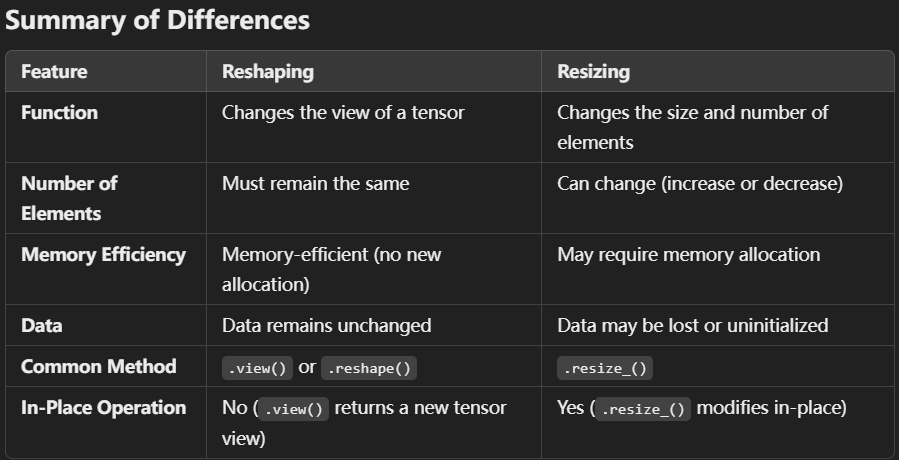


In [16]:
# Assignment: ractice reshaping and slicing tensors with different shape

# Creat a tensor of shape(4, 3) and reshape it to (3, 4)
tensor = torch.randn(4, 3)
print(f"tensor = {tensor}")
reshaped_tensor = tensor.view(3, 4)
print(f"reshaped_tensor = {reshaped_tensor}")

tensor = tensor([[ 0.7398, -0.0217, -0.5210],
        [-0.6307,  1.0332,  0.0871],
        [-0.3218,  1.2397,  0.1795],
        [-1.9788, -0.5969,  0.2844]])
reshaped_tensor = tensor([[ 0.7398, -0.0217, -0.5210, -0.6307],
        [ 1.0332,  0.0871, -0.3218,  1.2397],
        [ 0.1795, -1.9788, -0.5969,  0.2844]])


In [25]:
# Original tensor with shape (2, 3)
b = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Resize the tensor to (3, 3) in-place
b.resize_(3, 3)

# The new elements are uninitialized and may contain random values.
print(b)


tensor([[                  1,                   2,                   3],
        [                  4,                   5,                   6],
        [4599468989859495936, 4608261980841574400, 4595635506062032896]])
